# Scatter Plot

In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df = df[df['job_title_short'] == 'Data Analyst']

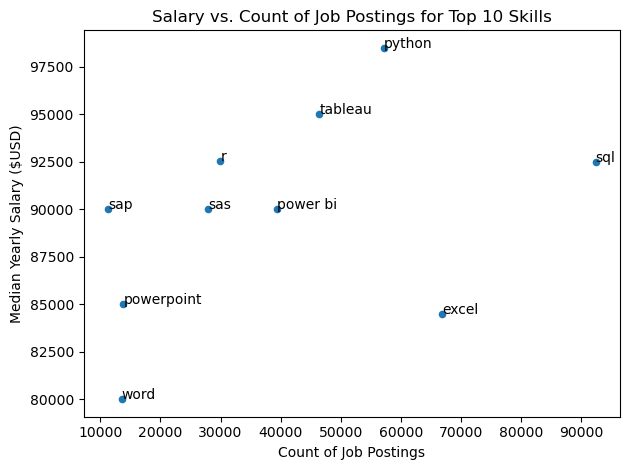

In [21]:
# explode the job_skills into individual rows
df_exploded = df.explode('job_skills')

# calculate the average salary and count of job postings per skill
skill_sats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

skill_sats = skill_sats.sort_values(by='skill_count',ascending=False).head(10)


skill_sats.plot(kind='scatter',x='skill_count',y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

# create a loop to find skill location (x,y)
for i, txt in enumerate(skill_sats.index):
    plt.text(skill_sats['skill_count'].iloc[i],skill_sats['median_salary'].iloc[i],txt)
plt.show()

# Median Yearly Salary vs. Job Count

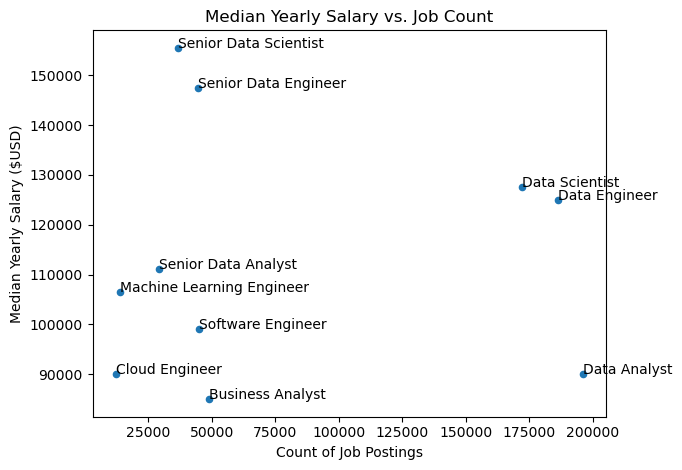

In [41]:
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna (x) else x)

df_scatter = df.groupby(['job_title_short']).agg(
    job_count = ('job_title_short','count'),
    median_salary = ('salary_year_avg','median')
)


df_scatter.plot(kind='scatter',x='job_count',y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Median Yearly Salary vs. Job Count')
plt.tight_layout()

for i, txt in enumerate (df_scatter.index):
    plt.text(df_scatter['job_count'].iloc[i], df_scatter['median_salary'].iloc[i],txt)

plt.show()

# Top 7 Countries by Median Yearly Salary vs Job Count

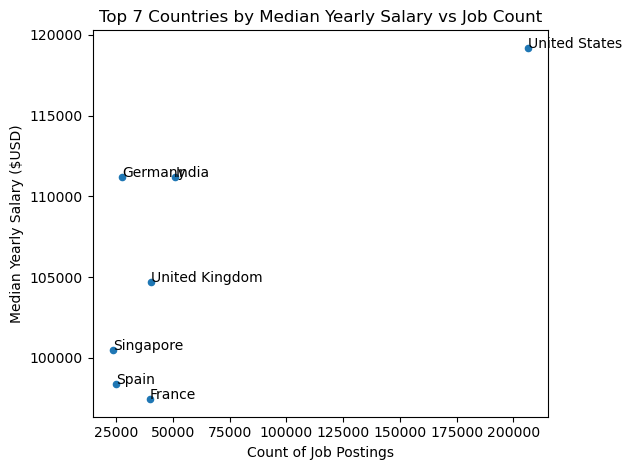

In [66]:
df_country = df.copy()
df_country = df_country.groupby(['job_country']).agg(
    job_count = ('job_title_short','count'),
    median_salary = ('salary_year_avg','median')
)

df_country=df_country.sort_values(by='job_count',ascending=False).head(7)

df_country.plot(kind='scatter',x='job_count',y='median_salary')
plt.title('Top 7 Countries by Median Yearly Salary vs Job Count')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Count of Job Postings')

for i , txt in enumerate(df_country.index):
    plt.text(
    df_country['job_count'].iloc[i],
    df_country['median_salary'].iloc[i],
    txt
    )
plt.tight_layout()
plt.show()

# Average Yearly Salary vs. Job Count for Top Roles by Schedule Type

In [ ]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

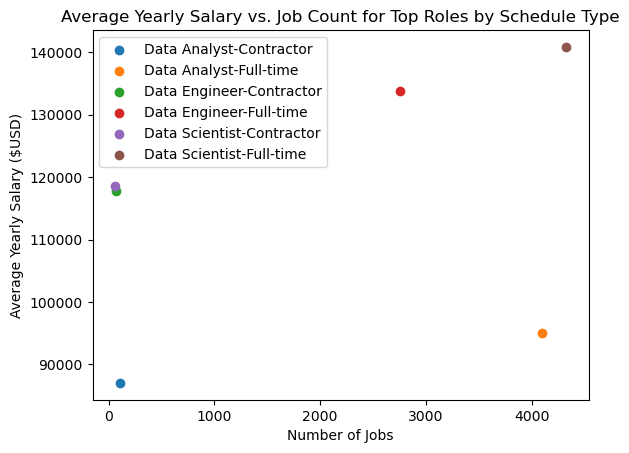

In [124]:
target_job_titles=['Data Analyst','Data Scientist','Data Engineer']

# Filter US jobs for only full-time and contractor roles and specific job titles, then drop rows with missing salary data

us_jobs_df = df[
    (df['job_country'] == 'United States')&
    (df['job_schedule_type'].isin (['Full-time','Contractor']))&
    (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# goupby and find mean and job counts
stats=us_jobs_df.groupby(['job_title_short','job_schedule_type']).agg(
    avg_salary=('salary_year_avg','mean'),
    job_count = ('job_title_short','count')
).dropna()

#reset index
stats.reset_index(inplace=True)

# combine title with schedule type
stats['title_type'] = stats['job_title_short'] + '-' + stats['job_schedule_type']

# plot
for job_title_type in stats['title_type'].unique():
    subset=stats[stats['title_type'] ==job_title_type]
    plt.scatter(subset['job_count'], subset['avg_salary'], label = job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary ($USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()
